<a href="https://colab.research.google.com/github/Vangmay/Character-Classification/blob/main/TheOfficeCharacters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -Uqq fastai duckduckgo_search
!pip install fastai fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 78.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
from fastdownload import download_url
from fastai.vision.all import *
from fastbook import *
from fastdownload import download_url

In [4]:
urls = search_images_ddg('Micheal Scott ', max_images=2)

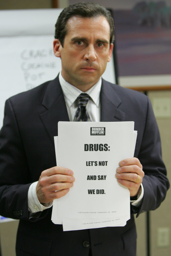

In [ ]:
dest = "MichealScott.jpg"
download_url(urls[1], dest, show_progress = False)
Image.open(dest).to_thumb(256,256)

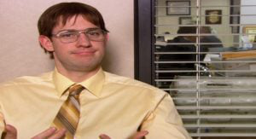

In [ ]:
download_url(search_images_ddg('Jim from the office', max_images=1)[0], "jim.jpg", show_progress = False)
Image.open("jim.jpg").to_thumb(256,256)

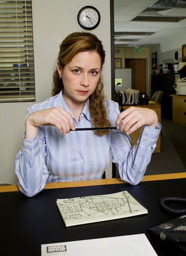

In [ ]:
download_url(search_images_ddg('Pam from the office', max_images=3)[2], "pam.jpg", show_progress = False)
Image.open("pam.jpg").to_thumb(256,256)

Making a dataset by scraping the internet using search_image_ddg

In [13]:
searches = [
    "Michael Scott",
    "Jim Halpert",
    "Pam Beesly",
    "Stanley Hudson",
    "Phyllis Vance",
    "Dwight Schrute",
    "Andy Bernard",
    "Toby Flenderson",
]
path = Path("data")
from time import sleep
for target in searches:
  dest = (path/target)
  dest.mkdir(exist_ok = True, parents = True)
  download_images(dest, urls=search_images_ddg(f"{target} FACE from THE OFFICE"))
  sleep(10)
  resize_images(path/target, max_size = 400, dest = path/target)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1038: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry for transparency")
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [14]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

255

In [15]:
dls = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2, seed = 42),
    get_y = parent_label,
    item_tfms = [Resize(192, method = "squish")]
).dataloaders(path, bs=32)

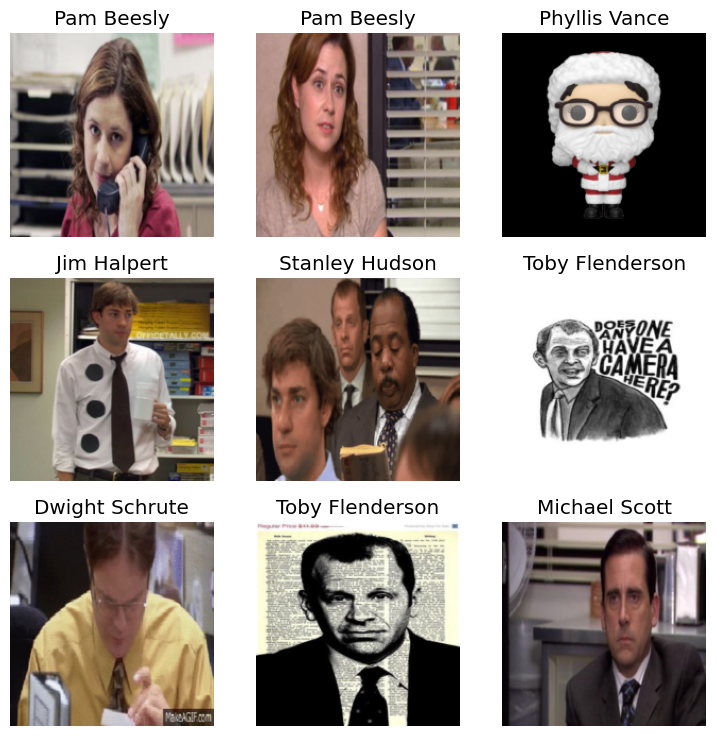

In [16]:
dls.show_batch()

In [17]:
learn = vision_learner(dls, resnet34, metrics = error_rate)
learn.fine_tune(10)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,2.424213,1.412822,0.434615,00:08


epoch,train_loss,valid_loss,error_rate,time
0,1.096774,1.089523,0.342308,00:09
1,0.760494,0.982549,0.273077,00:08
2,0.479541,0.890547,0.238462,00:09
3,0.315484,0.856341,0.200000,00:07
4,0.206146,0.974844,0.200000,00:09
5,0.140111,1.063999,0.219231,00:08
6,0.107341,0.936697,0.207692,00:08
7,0.077303,0.912148,0.196154,00:09
8,0.052350,0.885955,0.184615,00:07
9,0.036860,0.871518,0.192308,00:09


In [18]:
learn.export('model.pkl')

    The model can only Classify these characters
    "Michael Scott",
    "Jim Halpert",
    "Pam Beesly",
    "Stanley Hudson",
    "Phyllis Vance",
    "Dwight Schrute",
    "Andy Bernard",
    "Toby Flenderson",

Try changing the Name Variable and playing around

THIS IS Jim Halpert


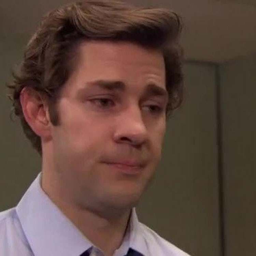

In [19]:
name = "Jim Halpert"
download_url(search_images_ddg(name + "FROM THE OFFICE", max_images=3)[0], name+".jpg", show_progress = False)
whoisthis, _, Probs = learn.predict(PILImage.create(name+".jpg"))
print(f"THIS IS {whoisthis}")
Image.open(name+".jpg").to_thumb(256,256)

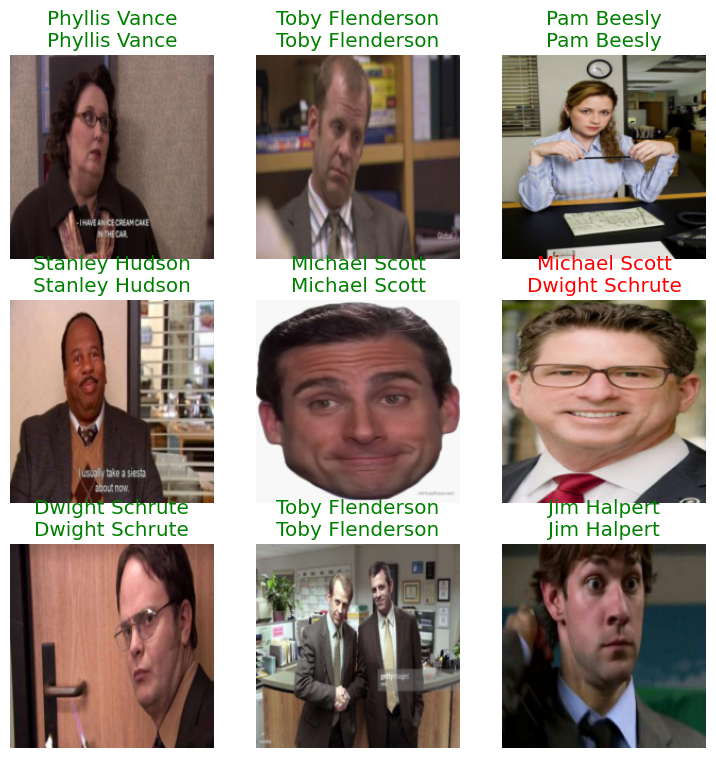

In [20]:
learn.show_results()

In [ ]:
!zip -r dataset.zip data

  adding: data/ (stored 0%)
  adding: data/Jim Halpert/ (stored 0%)
  adding: data/Jim Halpert/39a9876c-e93a-4d0e-b85e-a9a1eb316335.jpg (deflated 1%)
  adding: data/Jim Halpert/bbada11b-e33a-4b15-b189-05e63b5e2b55.png (deflated 0%)
  adding: data/Jim Halpert/7758a172-8561-40ed-a46d-aa377548c85a.jpg (deflated 1%)
  adding: data/Jim Halpert/892894df-930d-4fd7-90c1-312761e6263a.jpg (deflated 1%)
  adding: data/Jim Halpert/c2b59986-4e2d-4e34-9c01-d5700eac2c7e.jpg (deflated 1%)
  adding: data/Jim Halpert/b5442985-e48e-46de-bab3-1f23e63a8ebf.jpg (deflated 12%)
  adding: data/Jim Halpert/a64cb2eb-b023-4a73-b0f1-02f0a65ffadb.jpg (deflated 2%)
  adding: data/Jim Halpert/ef0a01f3-c2a4-46fa-888e-193dc129a2b7.jpg (deflated 1%)
  adding: data/Jim Halpert/fe600e60-04e3-4c03-873f-3b1671e7695b.jpg (deflated 1%)
  adding: data/Jim Halpert/9b3b46b9-c3fb-4c68-b1a7-ac844bf67e42.png (deflated 0%)
  adding: data/Jim Halpert/302ab803-2d02-4b9c-886c-ec525ec2f6a2.jpg (deflated 1%)
  adding: data/Jim Halpert/a3